In [9]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

# Task 1: Implement the calculation of the IoU score

In [187]:
import h5py

# Replace 'your_file.h5' with the actual file path
file_path = 'rectanglesdsss.sec'

ground_truth = dict()
predicted = dict()

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Access the 'ground_truth' and 'predicted' groups
    ground_truth_group = file['ground_truth']
    predicted_group = file['predicted']

    # Iterate through each element in the groups
    for i in range(100):
        # Access the i-th element in 'ground_truth' and 'predicted'
        ground_truth_element = ground_truth_group["i" + str(i)]
        predicted_element = predicted_group["i" + str(i)]

        # Access the tuple elements (i0, i1, i2, i3)
        i0_value = ground_truth_element.attrs['i0']
        i1_value = ground_truth_element.attrs['i1']
        i2_value = ground_truth_element.attrs['i2']
        i3_value = ground_truth_element.attrs['i3']
        
        # same for predicted
        i0_value_p = predicted_element.attrs['i0']
        i1_value_p = predicted_element.attrs['i1']
        i2_value_p = predicted_element.attrs['i2']
        i3_value_p = predicted_element.attrs['i3']
        
        # Store the values in the dictionary
        ground_truth[i] = (i0_value, i1_value, i2_value, i3_value)
        predicted[i] = (i0_value_p, i1_value_p, i2_value_p, i3_value_p)
        

print(ground_truth)
print(predicted)


{0: (1.2230114285248028, 3.172476462256429, 19.18975507295538, 1.494912895018739), 1: (1.7293876699636834, 0.41062009241834174, 17.418929129783415, 9.999079347008308), 2: (1.6028207993507881, 2.176393028598242, 8.077340530021507, 7.495223961734107), 3: (0.7100331694451534, 0.42572020100943075, 12.157639430217985, 18.450125778885468), 4: (0.15884690823168957, 2.2577444798534687, 6.579128465658942, 12.04636950909922), 5: (4.334429218207596, 4.723069587140477, 13.599230060418755, 9.922798090994881), 6: (1.2537462367288876, 3.823546409905636, 12.893012201454834, 15.653640580085092), 7: (0.4422119190630308, 1.9577643985791986, 1.9551996962095575, 15.252601075346561), 8: (0.6108554158388491, 2.9457350268407216, 14.459368342698777, 9.3306926829448), 9: (2.6211504713740186, 2.7356558481896673, 7.918980120480239, 3.0328968388774595), 10: (3.5537532406802774, 0.6097439933075294, 10.89629673651157, 13.663026127106422), 11: (2.043120537571028, 3.756640484992437, 7.862878012515935, 5.52287240030443

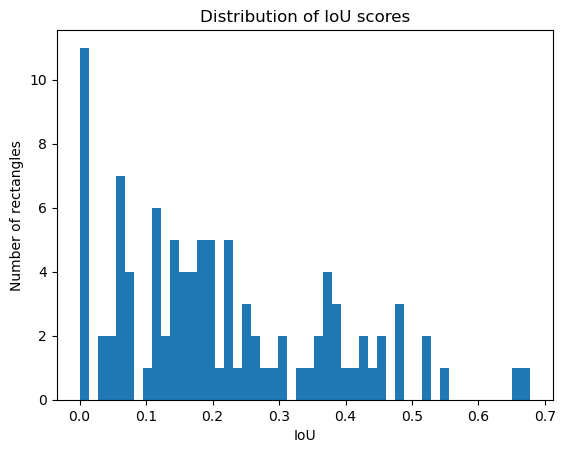

In [194]:
import numpy as np

def calculate_iou(rect1, rect2):
    # Extract coordinates and dimensions from rectangles
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2

    # Calculate coordinates of intersect rectangle
    intersect_x1 = max(x1, x2)
    intersect_y1 = max(y1, y2)
    intersect_x2 = min(x1 + w1, x2 + w2)
    intersect_y2 = min(y1 + h1, y2 + h2)

    # Calculate area of intersect rectangle
    intersect_area = max(0, intersect_x2 - intersect_x1) * max(0, intersect_y2 - intersect_y1)

    # Calculate area of each rectangle
    area_rect1 = w1 * h1
    area_rect2 = w2 * h2

    # Calculate union area
    union_area = area_rect1 + area_rect2 - intersect_area

    # Calculate IOU
    iou = intersect_area / union_area if union_area > 0 else 0

    return iou


# calculate the iou for each rectangle and plot a histogram
ious = []
for i in range(100):
    iou = calculate_iou(ground_truth[i], predicted[i])
    ious.append(iou)

plt.figure()
plt.title("Distribution of IoU scores")
plt.xlabel("IoU")
plt.ylabel("Number of rectangles")    
plt.hist(ious, 50)
print()
    

# Task 2 - Data Augmentation

In [106]:
def visualize(image, mask, original_image=None, original_mask=None, cmap='gray', description: str = None):
    fontsize = 10
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(8, 8))

        ax[0].imshow(image, cmap=cmap)
        ax[0].set_title(description+ ' image', fontsize=fontsize)
        
        ax[1].imshow(mask, cmap=cmap)
        ax[1].set_title(description+ ' mask', fontsize=fontsize)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image, cmap=cmap)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[0, 1].imshow(original_mask, cmap=cmap)
        ax[0, 1].set_title('Original mask', fontsize=fontsize)
        
        ax[1, 0].imshow(image, cmap=cmap)
        ax[1, 0].set_title(description + " image", fontsize=fontsize)
        
        ax[1, 1].imshow(mask, cmap=cmap)
        ax[1, 1].set_title(description + "mask", fontsize=fontsize)

files count:100
57


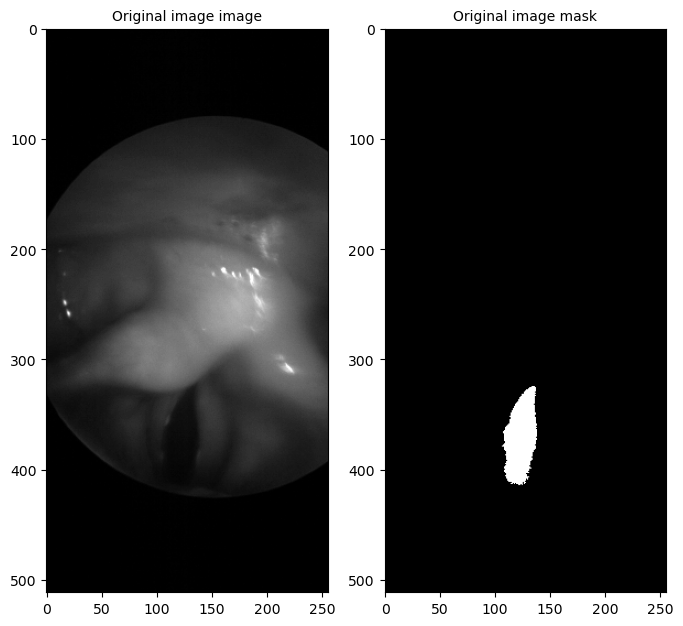

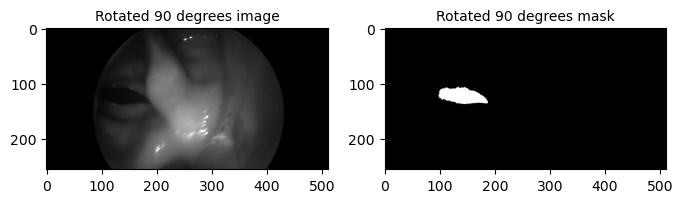

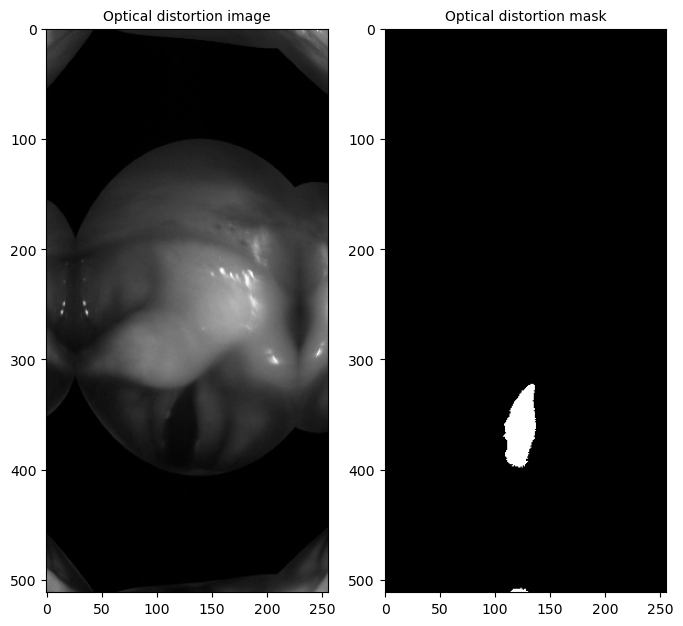

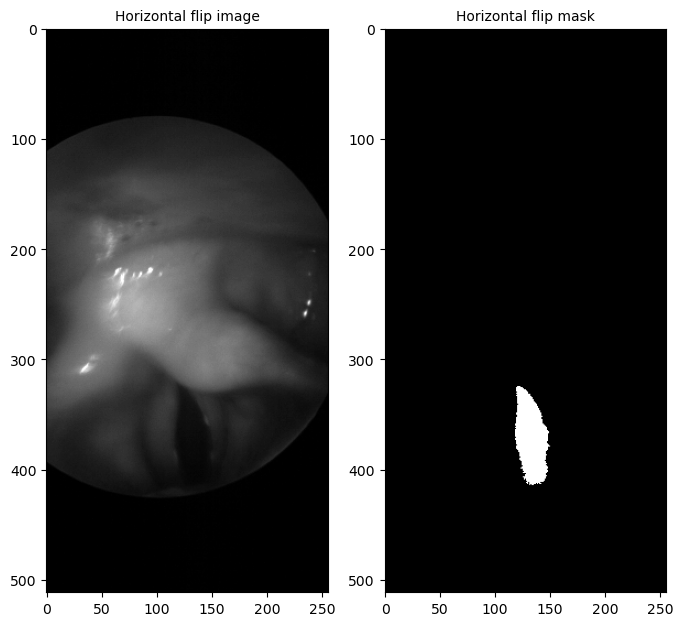

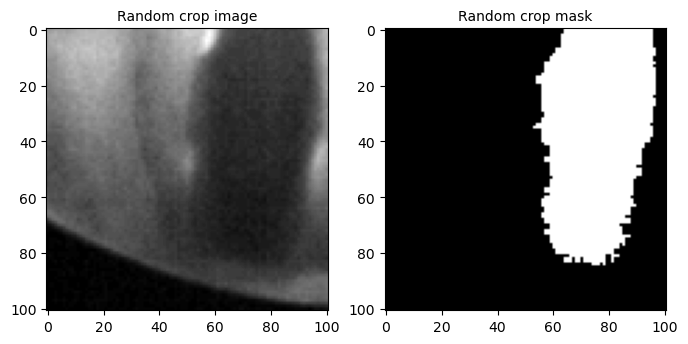

In [123]:
# choose a random image and it is mask from the Mini_BAGLS_dataset using np.random.choice()

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import albumentations as A
import cv2 as cv
def read_images(folder_path : str, num_images: int) -> None:
    
    """_summary_
    """
    
    # Get how many files in the folder
    
    files_count = len([entry for entry in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, entry))]) // 3
    
    print("files count:" + str(files_count))
    
    for img in range(num_images):
        img_id = np.random.choice(list(range(files_count)))
        print(img_id)
        
        file_path = folder_path + "/" + str(img_id)
        
        random_image = cv.imread(file_path + ".png", cv.IMREAD_GRAYSCALE)
        random_image_mask = cv.imread(file_path + "_seg.png", cv.IMREAD_GRAYSCALE)
        
        # define the augmentation
        # rortae the image by 90 degrees
        aug = A.RandomRotate90(p=1)
        augmented = aug(image=random_image, mask=random_image_mask)
        
        image_rot90 = augmented["image"]
        mask_rot90 = augmented["mask"]
        
        # Original image
        visualize(random_image, random_image_mask, cmap="gray", description="Original image")
        
        # Rotated 90 degrees
        visualize(image_rot90, mask_rot90, description="Rotated 90 degrees")
        
        # Optical distortion
        aug = A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)
        augmented = aug(image=random_image, mask=random_image_mask)
        
        image_optical = augmented['image']
        mask_optical = augmented['mask']
        
        visualize(image_optical, mask_optical, description="Optical distortion")
        
        # horizontal flip
        aug = A.HorizontalFlip(p=1)
        augmented = aug(image=random_image, mask=random_image_mask)
        
        image_hflip = augmented['image']
        mask_hflip = augmented['mask']
        
        visualize(image_hflip, mask_hflip, description="Horizontal flip")
        
        # randomsized crop
        aug = A.RandomSizedCrop(min_max_height=(50, 101), height=101, width=101, p=1)
        augmented = aug(image=random_image, mask=random_image_mask)
        
        image_crop = augmented['image']
        mask_crop = augmented['mask']
        
        visualize(image_crop, mask_crop, description="Random crop")
        
        
        
        
read_images(folder_path="Mini_BAGLS_dataset", num_images=1)

